In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load dataset
data = np.genfromtxt("data/robot_arm.dat")
u = data[:,0]
y = data[:,1]

# Plot input and output
if False:
    t_ = np.linspace(0, len(y)-1, len(y))
    plt.figure()
    plt.plot(t_, y)
    plt.xlabel("Sample")
    plt.ylabel("Output")

    plt.figure()
    plt.plot(t_, u)
    plt.xlabel("Sample")
    plt.ylabel("Input")
    plt.show()

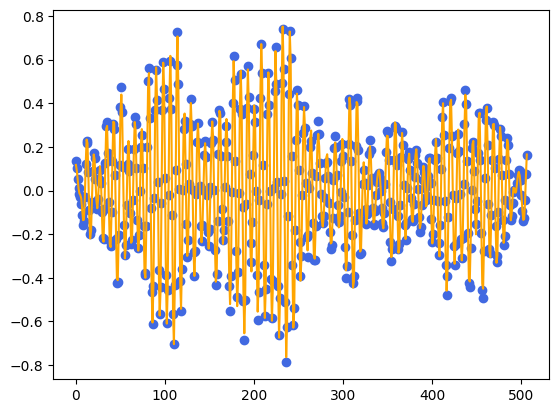

In [4]:
# Construct X and Y matrices for regression
TRAIN_TEST_SPLIT = 0.5
NUM_DELAYS = 5
LS_ORDER = 1
BETA = 1e-1

# Split raw data into train and test sets
train_test_index = int(len(y)*TRAIN_TEST_SPLIT)
y_train = y[:train_test_index]
y_test  = y[train_test_index:]
u_train = u[:train_test_index]
u_test  = u[train_test_index:]

# Construct training data matrices
Y_train = np.expand_dims(y_train[NUM_DELAYS:], axis=1)
X_train = np.zeros(shape=(len(y_train)-NUM_DELAYS, 2*NUM_DELAYS))
for i in range(len(y_train)-NUM_DELAYS):
    X_train[i,:NUM_DELAYS] = y_train[i:i+NUM_DELAYS]
    X_train[i,NUM_DELAYS:] = u_train[i:i+NUM_DELAYS]

def construct_H(X, model_order):
    dp, features = X.shape
    H = np.ones(shape=(dp,1))
    for order in range(1,model_order+1):
        for i in range(features):
            for j in range(i, features):
                if j == i:
                    H_ = np.power(X[:,[i]], order)
                    H = np.hstack((H, H_))
                else:
                    for k in range(1, order):
                        H_ = np.multiply(np.power(X[:,[i]], k), np.power(X[:,[j]], order-k))
                        H = np.hstack((H, H_))
    return H

def model_ls(x, w, model_order):
    h_ = construct_H(x, model_order)
    y_ = h_ @ w
    return y_

# Get model params
H_train = construct_H(X_train, LS_ORDER)
w = np.linalg.inv(H_train.T @ H_train + BETA*np.eye(H_train.shape[1])) @ H_train.T @ Y_train

# Plot training results
t_ = np.linspace(0, Y_train.shape[0]-1, Y_train.shape[0])
Y_pred_train = model_ls(X_train, w, model_order=LS_ORDER)
plt.scatter(t_, Y_train, c="royalblue")
plt.plot(t_, Y_pred_train, c="orange")
plt.show()

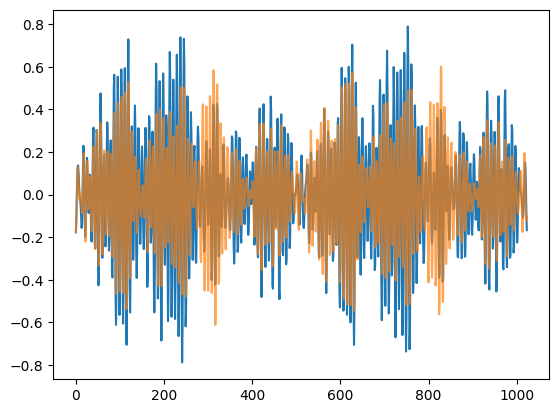

In [6]:
# Testing loop
Y_pred = np.zeros(shape=(0,1))
for i in range(len(y)):
    if i < NUM_DELAYS:
        Y_pred = np.vstack((Y_pred, y[i]))
    else:
        X_ = np.hstack(([Y_pred[-NUM_DELAYS:,0]], [u[i-NUM_DELAYS:i]]))
        Y_pred_ = model_ls(X_, w, model_order=LS_ORDER)
        Y_pred = np.vstack((Y_pred, Y_pred_))
Y_pred = Y_pred.flatten()

plt.plot(y)
plt.plot(Y_pred, alpha=0.7)
plt.show()

In [39]:
y.shape

(1024,)

In [40]:
Y_pred.shape

(1024,)

In [41]:
def testPoint(y, u, train_test_split, num_delays, ls_order, beta):
    train_test_index = int(len(y)*train_test_split)
    y_train = y[:train_test_index]
    u_train = u[:train_test_index]

    # Construct training data matrices
    Y_train = np.expand_dims(y_train[num_delays:], axis=1)
    X_train = np.zeros(shape=(len(y_train)-num_delays, 2*num_delays))
    for i in range(len(y_train)-num_delays):
        X_train[i,:num_delays] = y_train[i:i+num_delays]
        X_train[i,num_delays:] = u_train[i:i+num_delays]

    # Get model params
    H_train = construct_H(X_train, ls_order)
    w = np.linalg.inv(H_train.T @ H_train + beta*np.eye(H_train.shape[1])) @ H_train.T @ Y_train

    Y_pred = np.zeros(shape=(0,1))
    for i in range(len(y)):
        if i < num_delays:
            Y_pred = np.vstack((Y_pred, y[i]))
        else:
            X_ = np.hstack(([Y_pred[-num_delays:,0]], [u[i-num_delays:i]]))
            Y_pred_ = model_ls(X_, w, model_order=ls_order)
            Y_pred = np.vstack((Y_pred, Y_pred_))
    Y_pred = Y_pred.flatten()

    return mean_squared_error(y[:train_test_index], Y_pred[:train_test_index])

In [48]:
print(testPoint(y, u, train_test_split=0.5, num_delays=10, ls_order=1, beta=1e-2))

0.00017426215385335893


In [74]:
delay_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
order_list = [1, 2, 3]
beta_list = [1e-3, 1e-1, 10]

# Results [delay, order, beta]
results = np.zeros(shape=(len(delay_list), len(order_list), len(beta_list)))
total_tests = len(delay_list)*len(order_list)*len(beta_list)
current_test = 0
for i, delay in enumerate(delay_list):
    for j, order in enumerate(order_list):
        for k, beta in enumerate(beta_list):
            current_test += 1
            print(f"Starting test {current_test}/{total_tests}...")
            test_mse = testPoint(y, u, train_test_split=0.5, num_delays=delay, ls_order=order, beta=beta)
            results[i,j,k] = test_mse
print("Finished all tests.")

Starting test 1/90...
Starting test 2/90...
Starting test 3/90...
Starting test 4/90...
Starting test 5/90...
Starting test 6/90...
Starting test 7/90...
Starting test 8/90...
Starting test 9/90...
Starting test 10/90...
Starting test 11/90...
Starting test 12/90...
Starting test 13/90...
Starting test 14/90...
Starting test 15/90...
Starting test 16/90...
Starting test 17/90...
Starting test 18/90...
Starting test 19/90...
Starting test 20/90...
Starting test 21/90...
Starting test 22/90...
Starting test 23/90...
Starting test 24/90...
Starting test 25/90...
Starting test 26/90...
Starting test 27/90...
Starting test 28/90...
Starting test 29/90...
Starting test 30/90...
Starting test 31/90...
Starting test 32/90...
Starting test 33/90...
Starting test 34/90...
Starting test 35/90...
Starting test 36/90...
Starting test 37/90...
Starting test 38/90...
Starting test 39/90...
Starting test 40/90...
Starting test 41/90...
Starting test 42/90...
Starting test 43/90...
Starting test 44/90.

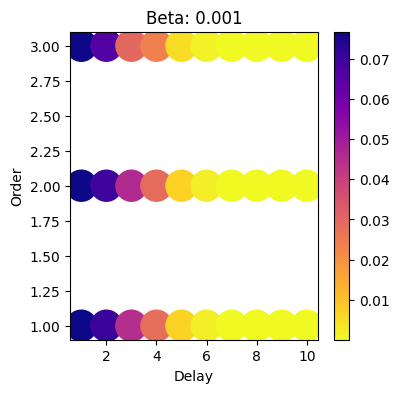

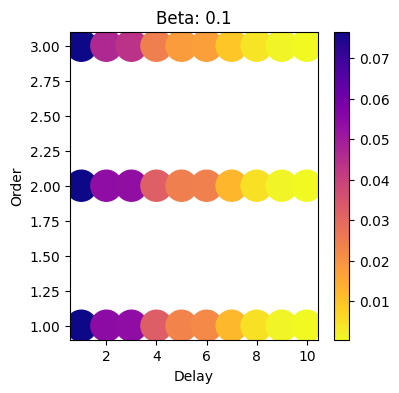

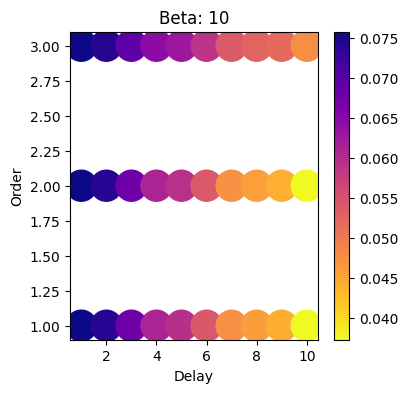

In [80]:
grid_dots = len(order_list)*len(delay_list)
for k, beta in enumerate(beta_list):
    res_ = np.zeros(shape=(grid_dots,3))
    for i, delay in enumerate(delay_list):
        for j, order in enumerate(order_list):
            sample_index = i*len(order_list) + j
            res_[sample_index, :] = [delay, order, results[i,j,k]]
    plt.figure(figsize=(4,4))
    plt.scatter(res_[:,0], res_[:,1], c=res_[:,2], cmap="plasma_r", s=500)
    plt.colorbar()
    plt.xlabel("Delay")
    plt.ylabel("Order")
    plt.title(f"Beta: {beta}")
plt.show()
